# Make data even (negative vs. positive)
# And split to test data

In [22]:
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## Get the data to use

In [23]:
# Load data
with open('tokenized_reviews.pickle', 'rb') as handle:
    df = pickle.load(handle)

X = df.WordIndeces.values
Y = df.Label.values

In [24]:
print('Number of data points: %d' %len(Y))
df.head()

Number of data points: 568454


,Label,Score,WordIndeces
0,1,5,"[2, 16, 123, 317, 7, 1, 4998, 516, 102, 51, 20..."
1,0,1,"[40, 372, 2210, 22, 5809, 1960, 1075, 1, 1075,..."
2,1,4,"[9, 8, 4, 7126, 13, 49, 82, 275, 4, 162, 9315,..."
3,0,2,"[35, 18, 19, 250, 10, 1, 2625, 570, 11, 24049,..."
4,1,5,"[37, 3580, 31, 4, 37, 86, 78, 20, 4, 2073, 214..."


## Make the split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Show the distribution

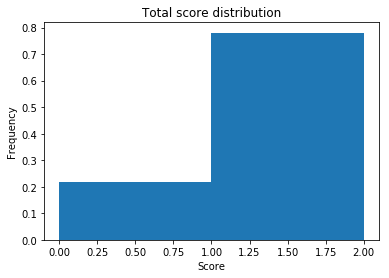

Total number of data points: 568454


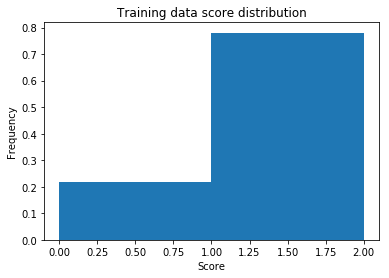

Number of training data points: 454763


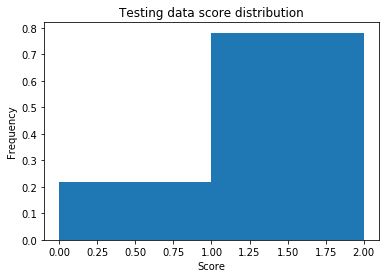

Number of testing data points: 113691


In [26]:
###### SCORE DISTRIBUTION ######
plt.hist(df.Label.values, bins=[0,1,2], normed=True)
plt.title('Total score distribution')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.show()
print('Total number of data points: %d' %len(df.Label.values))

plt.hist(Y_train, bins=[0,1,2], normed=True)
plt.title('Training data score distribution')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.show()
print('Number of training data points: %d' %len(Y_train))

plt.hist(Y_test, bins=[0,1,2], normed=True)
plt.title('Testing data score distribution')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.show()
print('Number of testing data points: %d' %len(Y_test))

## Save data split

In [27]:
with open('X_train.pickle', 'wb') as handle:
    pickle.dump(X_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('Y_train.pickle', 'wb') as handle:
    pickle.dump(Y_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('X_test.pickle', 'wb') as handle:
    pickle.dump(X_test, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('Y_test.pickle', 'wb') as handle:
    pickle.dump(Y_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Make even subsets

In [28]:
A = np.array([1,2,1])
np.nonzero(A==1)

(array([0, 2]),)

In [29]:
downvote_records = len(Y[Y == 0])
print('Number of negative reviews: %d' %downvote_records)
downvote_indices = np.array(np.nonzero(Y == 0)).transpose()
downvote_indices = downvote_indices.reshape(len(downvote_indices))

upvote_indices = np.array(np.nonzero(Y == 1)).transpose()
upvote_indices = upvote_indices.reshape(len(upvote_indices))

random_upvote_indices = np.random.choice(upvote_indices, downvote_records, replace = False)
random_upvote_indices = np.array(random_upvote_indices)

under_sample_indices = np.concatenate([downvote_indices,random_upvote_indices])

Y_even = Y[under_sample_indices]
X_even = X[under_sample_indices]
scores_even = df.Score.values[under_sample_indices]

print("Percentage of upvote transactions: ", len(Y_even[Y_even == 1])/len(Y_even))
print("Percentage of downvote transactions: ", len(Y_even[Y_even == 0])/len(Y_even))
print("Total number of records in resampled data: ", len(Y_even))

Number of negative reviews: 124677
Percentage of upvote transactions:  0.5
Percentage of downvote transactions:  0.5
Total number of records in resampled data:  249354


## Make even subset split

In [30]:
X_train_even, X_test_even, Y_train_even, Y_test_even, scores_train_even, scores_test_even = train_test_split(X_even, Y_even, scores_even, test_size=0.2, random_state=0)

## Show even subset

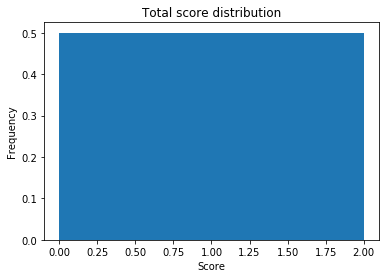

Total number of data points: 249354


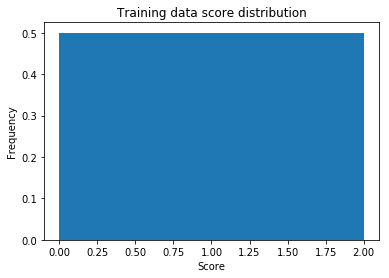

Number of training data points: 199483


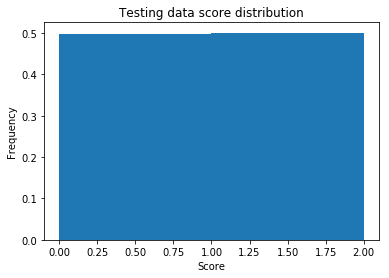

Number of testing data points: 49871


In [31]:
###### SCORE DISTRIBUTION ######
plt.hist(Y_even, bins=[0,1,2], normed=True)
plt.title('Total score distribution')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.show()
print('Total number of data points: %d' %len(Y_even))

plt.hist(Y_train_even, bins=[0,1,2], normed=True)
plt.title('Training data score distribution')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.show()
print('Number of training data points: %d' %len(Y_train_even))

plt.hist(Y_test_even, bins=[0,1,2], normed=True)
plt.title('Testing data score distribution')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.show()
print('Number of testing data points: %d' %len(Y_test_even))

## Reformat

In [32]:
second_dim = len(X_train_even[0])
tmp = np.concatenate(X_train_even).ravel()
X_train_even = np.reshape(tmp,(len(X_train_even),second_dim,1))

tmp = np.concatenate(X_test_even).ravel()
X_test_even = np.reshape(tmp,(len(X_test_even),second_dim,1))

print('Training and testing data shapes:')
print(X_train_even.shape)
print(X_test_even.shape)

Training and testing data shapes:
(199483, 100, 1)
(49871, 100, 1)


## Save even split

In [33]:
with open('X_train_even.pickle', 'wb') as handle:
    pickle.dump(X_train_even, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('Y_train_even.pickle', 'wb') as handle:
    pickle.dump(Y_train_even, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('X_test_even.pickle', 'wb') as handle:
    pickle.dump(X_test_even, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('Y_test_even.pickle', 'wb') as handle:
    pickle.dump(Y_test_even, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('scores_train_even.pickle', 'wb') as handle:
    pickle.dump(scores_train_even, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('scores_test_even.pickle', 'wb') as handle:
    pickle.dump(scores_test_even, handle, protocol=pickle.HIGHEST_PROTOCOL)